In [1]:
import nltk
nltk.download('stopwords')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to C:\Users\SRINIVAS
[nltk_data]     SRIKAKOLAPU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
train_bodies=pd.read_csv('train_bodies.csv')
train_stances=pd.read_csv('train_stances.csv')

In [3]:
train_data=pd.merge(train_bodies,train_stances,how='left',on='Body ID')

In [4]:
test_stance = pd.read_csv('competition_test_stances.csv')
test_body = pd.read_csv('test_bodies.csv')

In [5]:
test_data  = pd.merge( test_body, test_stance,how='left', on='Body ID')

In [6]:
target={'unrelated':0, 'agree':1, 'discuss':2, 'disagree':3}
train_data['Stance']=train_data['Stance'].map(target)

In [7]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
import string

def preprocessing(df,text):
    df["new"+text] = df[text].str.replace("\\n"," ",regex=True)
    df["new"+text] = df["new"+text].str.replace("_NEG","",regex=True)
    df["new"+text] = df["new"+text].str.replace("_NEGFIRST", "",regex=True)
    df["new"+text] = df["new"+text].str.replace(r"#","",regex=True)
    df["new"+text] = df["new"+text].str.replace(r"\*","",regex=True)
    df["new"+text] = df["new"+text].str.replace(r"\'s","",regex=True)
    df["new"+text] = df["new"+text].str.replace(r"\'m","am",regex=True)
    df["new"+text] = df["new"+text].str.replace(r"\'ve","have",regex=True)
    df["new"+text] = df["new"+text].str.replace(r"n\'t", " not",regex=True)
    df["new"+text] = df["new"+text].str.replace(r"\'re", " are",regex=True)
    df["new"+text] = df["new"+text].str.replace(r"\'d", "would",regex=True)
    df["new"+text] = df["new"+text].str.replace(r"\'ll", " will",regex=True)
    df["new"+text] = df["new"+text].str.replace(r",", "",regex=True)
    df["new"+text] = df["new"+text].str.replace(r"!", " !",regex=True)
    df["new"+text] = df["new"+text].str.replace(r"\(", "",regex=True)
    df["new"+text] = df["new"+text].str.replace(r"\)", "",regex=True)
    df["new"+text] = df["new"+text].str.replace(r"\?", " ?",regex=True)
    df["new"+text] = df["new"+text].str.replace(r'[^\x00-\x7F]',' ',regex=True)
    df["new"+text] = df["new"+text].str.replace(r'[^\w\s]',' ',regex=True)
    df["new"+text] = df["new"+text].str.replace("\d+", " ",regex=True)
    
    #df[text] = df[text].str.replace((r"\s{2,}", " "))
    
    df["new"+text] = df["new"+text].apply(lambda x: x.rstrip(',|.|;|:|\'|"'))
    df["new"+text] = df["new"+text].apply(lambda x: x.lstrip('\'|"'))

    
    
  

In [8]:

import pandas as pd
import string
from nltk.stem import PorterStemmer


def preprocessing1(df, column, stopwords):
    # Create a translation table to remove punctuation
    translator = str.maketrans('', '', string.punctuation)
    
    # Create a stemmer object
    stemmer = PorterStemmer()
    
    # Define a function to clean the text
    def clean(text):
        
        # Remove punctuation
        text = text.translate(translator)
        # Split the text into words
        words = text.split()
        # Remove stopwords
        words = [word for word in words if word.lower() not in stopwords]
        # Stem the words
        words = [stemmer.stem(word) for word in words]
        # Join the words back into a string
        return ' '.join(words)
    
    # Apply the clean function to the specified column
    df[column] = df[column].apply(clean)
    
    return df



stop_words=set(stopwords.words('english'))



In [9]:
#df = clean_text(df, 'text', stop_words)

In [10]:
train_data

,Body ID,articleBody,Headline,Stance
0,0,A small meteorite crashed into a wooded area i...,"Soldier shot, Parliament locked down after gun...",0
1,0,A small meteorite crashed into a wooded area i...,Tourist dubbed ‘Spider Man’ after spider burro...,0
2,0,A small meteorite crashed into a wooded area i...,Luke Somers 'killed in failed rescue attempt i...,0
3,0,A small meteorite crashed into a wooded area i...,BREAKING: Soldier shot at War Memorial in Ottawa,0
4,0,A small meteorite crashed into a wooded area i...,Giant 8ft 9in catfish weighing 19 stone caught...,0
...,...,...,...,...
49967,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Pizza delivery man gets tipped more than $2,00...",1
49968,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Pizza delivery man gets $2,000 tip",1
49969,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Luckiest Pizza Delivery Guy Ever Gets $2,000 Tip",1
49970,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...",Ann Arbor pizza delivery driver surprised with...,1


In [11]:
test_data

,Body ID,articleBody,Headline,Stance
0,1,Al-Sisi has denied Israeli reports stating tha...,Apple installing safes in-store to protect gol...,unrelated
1,1,Al-Sisi has denied Israeli reports stating tha...,El-Sisi denies claims he'll give Sinai land to...,agree
2,1,Al-Sisi has denied Israeli reports stating tha...,Apple to keep gold Watch Editions in special i...,unrelated
3,1,Al-Sisi has denied Israeli reports stating tha...,Apple Stores to Keep Gold “Edition” Apple Watc...,unrelated
4,1,Al-Sisi has denied Israeli reports stating tha...,South Korean woman's hair 'eaten' by robot vac...,unrelated
...,...,...,...,...
25408,2586,Remember how much Republicans wanted to repeal...,A Sign That Obamacare Exchanges Are Failing,disagree
25409,2586,Remember how much Republicans wanted to repeal...,Republicans call Obamacare a 'failure.' These ...,agree
25410,2586,Remember how much Republicans wanted to repeal...,CBO’s Alternate Facts Show Obamacare is Unsust...,disagree
25411,2586,Remember how much Republicans wanted to repeal...,Why Obamacare failed,disagree


In [12]:
test_data['Stance']=test_data['Stance'].map(target)

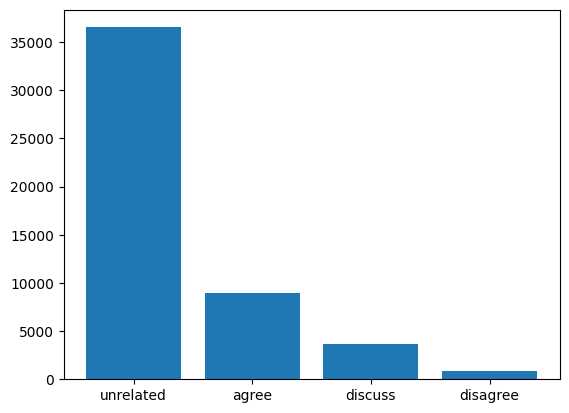

In [13]:
counts = train_data['Stance'].value_counts()
plt.bar(["unrelated","agree","discuss","disagree"], counts.values)
plt.show()

# PREPROCESSING  DONE

In [14]:
preprocessing(train_data,"Headline")

In [15]:
preprocessing(train_data,"articleBody")

In [16]:
preprocessing1(train_data,"newarticleBody",stop_words)

,Body ID,articleBody,Headline,Stance,newHeadline,newarticleBody
0,0,A small meteorite crashed into a wooded area i...,"Soldier shot, Parliament locked down after gun...",0,Soldier shot Parliament locked down after gunf...,small meteorit crash wood area nicaragua capit...
1,0,A small meteorite crashed into a wooded area i...,Tourist dubbed ‘Spider Man’ after spider burro...,0,Tourist dubbed Spider Man after spider burro...,small meteorit crash wood area nicaragua capit...
2,0,A small meteorite crashed into a wooded area i...,Luke Somers 'killed in failed rescue attempt i...,0,Luke Somers killed in failed rescue attempt i...,small meteorit crash wood area nicaragua capit...
3,0,A small meteorite crashed into a wooded area i...,BREAKING: Soldier shot at War Memorial in Ottawa,0,BREAKING Soldier shot at War Memorial in Ottawa,small meteorit crash wood area nicaragua capit...
4,0,A small meteorite crashed into a wooded area i...,Giant 8ft 9in catfish weighing 19 stone caught...,0,Giant ft in catfish weighing stone caught ...,small meteorit crash wood area nicaragua capit...
...,...,...,...,...,...,...
49967,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Pizza delivery man gets tipped more than $2,00...",1,Pizza delivery man gets tipped more than fo...,ann arbor mich pizza deliveri man michigan got...
49968,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Pizza delivery man gets $2,000 tip",1,Pizza delivery man gets tip,ann arbor mich pizza deliveri man michigan got...
49969,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Luckiest Pizza Delivery Guy Ever Gets $2,000 Tip",1,Luckiest Pizza Delivery Guy Ever Gets Tip,ann arbor mich pizza deliveri man michigan got...
49970,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...",Ann Arbor pizza delivery driver surprised with...,1,Ann Arbor pizza delivery driver surprised with...,ann arbor mich pizza deliveri man michigan got...


In [17]:
preprocessing1(train_data,"newHeadline",stop_words)

,Body ID,articleBody,Headline,Stance,newHeadline,newarticleBody
0,0,A small meteorite crashed into a wooded area i...,"Soldier shot, Parliament locked down after gun...",0,soldier shot parliament lock gunfir erupt war ...,small meteorit crash wood area nicaragua capit...
1,0,A small meteorite crashed into a wooded area i...,Tourist dubbed ‘Spider Man’ after spider burro...,0,tourist dub spider man spider burrow skin day,small meteorit crash wood area nicaragua capit...
2,0,A small meteorite crashed into a wooded area i...,Luke Somers 'killed in failed rescue attempt i...,0,luke somer kill fail rescu attempt yemen,small meteorit crash wood area nicaragua capit...
3,0,A small meteorite crashed into a wooded area i...,BREAKING: Soldier shot at War Memorial in Ottawa,0,break soldier shot war memori ottawa,small meteorit crash wood area nicaragua capit...
4,0,A small meteorite crashed into a wooded area i...,Giant 8ft 9in catfish weighing 19 stone caught...,0,giant ft catfish weigh stone caught itali thou...,small meteorit crash wood area nicaragua capit...
...,...,...,...,...,...,...
49967,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Pizza delivery man gets tipped more than $2,00...",1,pizza deliveri man get tip singl deliveri,ann arbor mich pizza deliveri man michigan got...
49968,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Pizza delivery man gets $2,000 tip",1,pizza deliveri man get tip,ann arbor mich pizza deliveri man michigan got...
49969,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Luckiest Pizza Delivery Guy Ever Gets $2,000 Tip",1,luckiest pizza deliveri guy ever get tip,ann arbor mich pizza deliveri man michigan got...
49970,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...",Ann Arbor pizza delivery driver surprised with...,1,ann arbor pizza deliveri driver surpris tip,ann arbor mich pizza deliveri man michigan got...


In [18]:
preprocessing(test_data,"Headline")

In [19]:
preprocessing(test_data,"articleBody")

In [20]:
preprocessing1(test_data,"newarticleBody",stop_words)

,Body ID,articleBody,Headline,Stance,newHeadline,newarticleBody
0,1,Al-Sisi has denied Israeli reports stating tha...,Apple installing safes in-store to protect gol...,0,Apple installing safes in store to protect gol...,al sisi deni isra report state offer extend ga...
1,1,Al-Sisi has denied Israeli reports stating tha...,El-Sisi denies claims he'll give Sinai land to...,1,El Sisi denies claims he will give Sinai land ...,al sisi deni isra report state offer extend ga...
2,1,Al-Sisi has denied Israeli reports stating tha...,Apple to keep gold Watch Editions in special i...,0,Apple to keep gold Watch Editions in special i...,al sisi deni isra report state offer extend ga...
3,1,Al-Sisi has denied Israeli reports stating tha...,Apple Stores to Keep Gold “Edition” Apple Watc...,0,Apple Stores to Keep Gold Edition Apple Watc...,al sisi deni isra report state offer extend ga...
4,1,Al-Sisi has denied Israeli reports stating tha...,South Korean woman's hair 'eaten' by robot vac...,0,South Korean woman hair eaten by robot vacuu...,al sisi deni isra report state offer extend ga...
...,...,...,...,...,...,...
25408,2586,Remember how much Republicans wanted to repeal...,A Sign That Obamacare Exchanges Are Failing,3,A Sign That Obamacare Exchanges Are Failing,rememb much republican want repeal obamacar re...
25409,2586,Remember how much Republicans wanted to repeal...,Republicans call Obamacare a 'failure.' These ...,1,Republicans call Obamacare a failure These ...,rememb much republican want repeal obamacar re...
25410,2586,Remember how much Republicans wanted to repeal...,CBO’s Alternate Facts Show Obamacare is Unsust...,3,CBO s Alternate Facts Show Obamacare is Unsust...,rememb much republican want repeal obamacar re...
25411,2586,Remember how much Republicans wanted to repeal...,Why Obamacare failed,3,Why Obamacare failed,rememb much republican want repeal obamacar re...


In [21]:
preprocessing1(test_data,"newHeadline",stop_words)

,Body ID,articleBody,Headline,Stance,newHeadline,newarticleBody
0,1,Al-Sisi has denied Israeli reports stating tha...,Apple installing safes in-store to protect gol...,0,appl instal safe store protect gold watch edit,al sisi deni isra report state offer extend ga...
1,1,Al-Sisi has denied Israeli reports stating tha...,El-Sisi denies claims he'll give Sinai land to...,1,el sisi deni claim give sinai land palestinian,al sisi deni isra report state offer extend ga...
2,1,Al-Sisi has denied Israeli reports stating tha...,Apple to keep gold Watch Editions in special i...,0,appl keep gold watch edit special store safe,al sisi deni isra report state offer extend ga...
3,1,Al-Sisi has denied Israeli reports stating tha...,Apple Stores to Keep Gold “Edition” Apple Watc...,0,appl store keep gold edit appl watch custom safe,al sisi deni isra report state offer extend ga...
4,1,Al-Sisi has denied Israeli reports stating tha...,South Korean woman's hair 'eaten' by robot vac...,0,south korean woman hair eaten robot vacuum cle...,al sisi deni isra report state offer extend ga...
...,...,...,...,...,...,...
25408,2586,Remember how much Republicans wanted to repeal...,A Sign That Obamacare Exchanges Are Failing,3,sign obamacar exchang fail,rememb much republican want repeal obamacar re...
25409,2586,Remember how much Republicans wanted to repeal...,Republicans call Obamacare a 'failure.' These ...,1,republican call obamacar failur chart show cou...,rememb much republican want repeal obamacar re...
25410,2586,Remember how much Republicans wanted to repeal...,CBO’s Alternate Facts Show Obamacare is Unsust...,3,cbo altern fact show obamacar unsustain,rememb much republican want repeal obamacar re...
25411,2586,Remember how much Republicans wanted to repeal...,Why Obamacare failed,3,obamacar fail,rememb much republican want repeal obamacar re...


In [22]:
train_data

,Body ID,articleBody,Headline,Stance,newHeadline,newarticleBody
0,0,A small meteorite crashed into a wooded area i...,"Soldier shot, Parliament locked down after gun...",0,soldier shot parliament lock gunfir erupt war ...,small meteorit crash wood area nicaragua capit...
1,0,A small meteorite crashed into a wooded area i...,Tourist dubbed ‘Spider Man’ after spider burro...,0,tourist dub spider man spider burrow skin day,small meteorit crash wood area nicaragua capit...
2,0,A small meteorite crashed into a wooded area i...,Luke Somers 'killed in failed rescue attempt i...,0,luke somer kill fail rescu attempt yemen,small meteorit crash wood area nicaragua capit...
3,0,A small meteorite crashed into a wooded area i...,BREAKING: Soldier shot at War Memorial in Ottawa,0,break soldier shot war memori ottawa,small meteorit crash wood area nicaragua capit...
4,0,A small meteorite crashed into a wooded area i...,Giant 8ft 9in catfish weighing 19 stone caught...,0,giant ft catfish weigh stone caught itali thou...,small meteorit crash wood area nicaragua capit...
...,...,...,...,...,...,...
49967,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Pizza delivery man gets tipped more than $2,00...",1,pizza deliveri man get tip singl deliveri,ann arbor mich pizza deliveri man michigan got...
49968,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Pizza delivery man gets $2,000 tip",1,pizza deliveri man get tip,ann arbor mich pizza deliveri man michigan got...
49969,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Luckiest Pizza Delivery Guy Ever Gets $2,000 Tip",1,luckiest pizza deliveri guy ever get tip,ann arbor mich pizza deliveri man michigan got...
49970,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...",Ann Arbor pizza delivery driver surprised with...,1,ann arbor pizza deliveri driver surpris tip,ann arbor mich pizza deliveri man michigan got...


In [23]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

train_data["newHeadlinetokens"] = train_data["newHeadline"].apply(tokenizer.tokenize)
train_data["newarticleBodytokens"]=train_data["newarticleBody"].apply(tokenizer.tokenize)
test_data["newHeadlinetokens"]=test_data["newHeadline"].apply(tokenizer.tokenize)
test_data["newarticleBodytokens"]=test_data["newarticleBody"].apply(tokenizer.tokenize)

In [24]:
sentence_lengths1 = [len(tokens) for tokens in train_data["newHeadlinetokens"]]
sentence_lengths2 = [len(tokens) for tokens in train_data["newarticleBodytokens"]]
sentence_lengths3=  [len(tokens) for tokens in test_data["newarticleBodytokens"]]
sentence_lengths4=[len(tokens) for tokens in test_data["newHeadlinetokens"]]

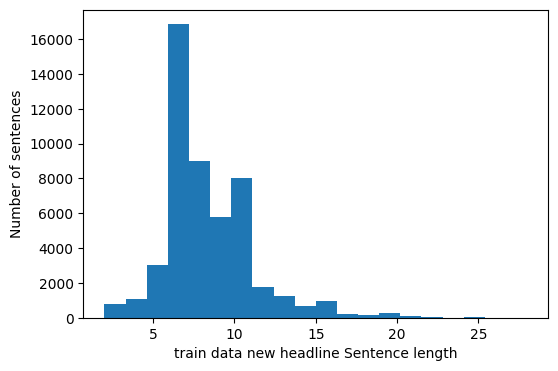

In [25]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 4)) 
plt.xlabel('train data new headline Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths1,bins=20)
plt.show()

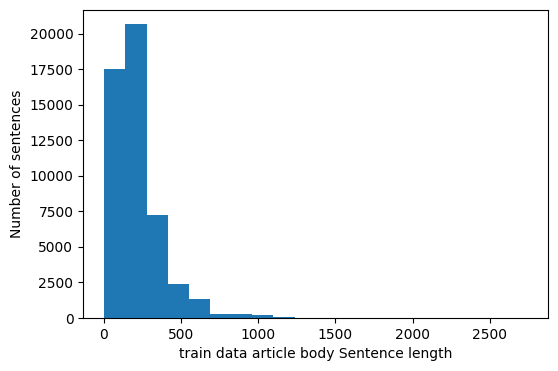

In [26]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 4)) 
plt.xlabel('train data article body Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths2,bins=20)
plt.show()

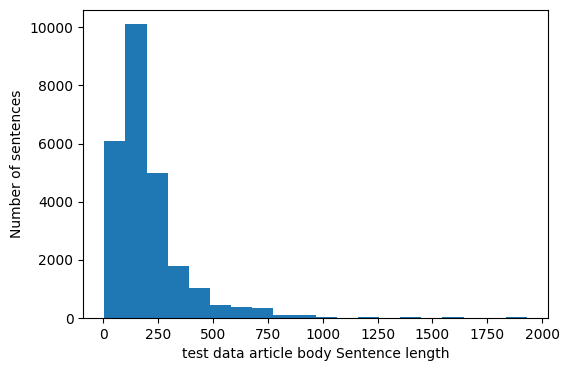

In [27]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 4)) 
plt.xlabel('test data article body Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths3,bins=20)
plt.show()

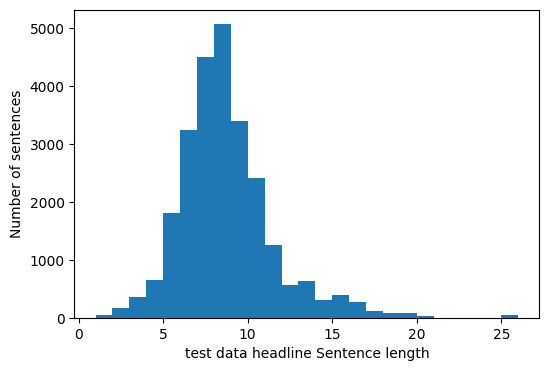

In [28]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 4)) 
plt.xlabel('test data headline Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths4,bins=25)
plt.show()

In [29]:
print("Max sentence length of train data newHeadline columns is %s" % max(sentence_lengths1))
print("Max sentence length of train data newarticleBody is %s" % max(sentence_lengths2))
print("Max sentence length of test data newarticleBody is %s" % max(sentence_lengths3))
print("Max sentence length of test data newHeadline  is %s" % max(sentence_lengths4))

Max sentence length of train data newHeadline columns is 28
Max sentence length of train data newarticleBody is 2742
Max sentence length of test data newarticleBody is 1931
Max sentence length of test data newHeadline  is 26


In [30]:
X_samp = train_data["newarticleBody"].dropna()

In [31]:
Y = train_data["Stance"].dropna()

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_Samp_Vect = vectorizer.fit_transform(X_samp)

In [33]:
a = X_Samp_Vect.toarray()

In [34]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
ch2 = SelectKBest(chi2, k=4500)
X_train_chi2 = ch2.fit_transform(X_Samp_Vect, Y)

In [35]:
features = vectorizer.get_feature_names_out()

In [36]:
feature_list = []
for i in range(0,len(ch2.get_support())):
    if ch2.get_support()[i] == True:
        feature_list.append(features[i])

In [37]:
Xt_samp = train_data["newHeadline"].dropna()

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
Xt_Samp_Vect = vectorizer.fit_transform(Xt_samp)

In [39]:
a = Xt_Samp_Vect.toarray()

In [40]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
ch2 = SelectKBest(chi2, k=500)
X_train_chi2 = ch2.fit_transform(Xt_Samp_Vect, Y)

In [41]:
features1 = vectorizer.get_feature_names_out()

In [42]:
feature_list1 = []
for i in range(0,len(ch2.get_support())):
    if ch2.get_support()[i] == True:
        feature_list1.append(features1[i])

In [43]:
chi_Square = []
for i in train_data["newarticleBody"]:
    words = i.split()
    for j in words:
        if(j not in feature_list):
            words.remove(j)
    chi_Square.append(" ".join(words))
chi_Square

['small meteorit wood area nicaragua capit managua overnight govern said sunday resid report mysteri deep crater near associ press report govern spokeswoman rosario murillo said committe govern studi determin small meteorit appear asteroid pass earth hous asteroid rc feet skim earth weekend abc report murillo said nicaragua intern expert scientist happen crater left meteorit radiu feet feet said humberto saballo nicaraguan territori studi committe said clear meteorit disintegr humberto garcia astronomi nation univers nicaragua said meteorit relat asteroid pass planet saturday night studi ice rock said wilfri strauch institut territori studi said one report streak light anyon someth local resid report loud saturday night said anyth sky porch noth heard blast bomb expans jorg told associ press crater near managua intern airport air forc base journalist state media visit',
 'small meteorit wood area nicaragua capit managua overnight govern said sunday resid report mysteri deep crater near

In [44]:
chi_Square_t = []
for i in train_data["newHeadline"]:
    words = i.split()
    for j in words:
        if(j not in feature_list1):
            words.remove(j)
    chi_Square_t.append(" ".join(words))
chi_Square_t

['shot lock erupt memori',
 'tourist spider man spider burrow skin day',
 'somer kill rescu yemen',
 'soldier war ottawa',
 'ft catfish stone itali biggest reel line',
 'stone catfish fish itali minut battl',
 'italian catch huge wel catfish record',
 'store pumpkin spice condom',
 'gunman kill shoot hill hunt',
 'shot memori',
 'photo jaw catch peopl real',
 'land catfish could world',
 'sourc brokaw brian fire',
 'shot war step nation',
 'pound catfish make huge catch catfish could set record',
 'rumor debunk robocop style robot microsoft campu',
 'catfish record kg',
 'catfish big swallow man caught',
 'somer sister say kill yemen rescu',
 'appl watch proof launch report',
 'shot canadian build',
 'shot war',
 'shot memori shot parliament',
 'threaten cut use web browser',
 'meteorit strike nicaragua capit managua',
 'soldier nation memori',
 'buy big pacif icon citi park',
 'canadian shot war report',
 'iraqi media rumor claim slain',
 'shoot memori hill report say shot',
 'pumpkin

In [45]:
train_data["Chi-Square_Headline"] = chi_Square_t

In [46]:
train_data["Chi-Square_Body"] = chi_Square

## Text to Sequences

In [47]:
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.tokenize import word_tokenize
X_train_prep_combined = train_data['Chi-Square_Headline'] + train_data['Chi-Square_Body']
X_train_prep_combined = pd.DataFrame(X_train_prep_combined)
X_train_prep_combined.columns = ['combined']
X_train_prep_combined

,combined
0,shot lock erupt memorismall meteorit wood area...
1,tourist spider man spider burrow skin daysmall...
2,somer kill rescu yemensmall meteorit wood area...
3,soldier war ottawasmall meteorit wood area nic...
4,ft catfish stone itali biggest reel linesmall ...
...,...
49967,pizza deliveri man tip deliveriann arbor pizza...
49968,pizza deliveri man tipann arbor pizza deliveri...
49969,luckiest pizza deliveri ever tipann arbor pizz...
49970,arbor pizza deliveri surpris tipann arbor pizz...


In [48]:
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.tokenize import word_tokenize
X_test_prep_combined = test_data['newHeadline'] + test_data['newarticleBody']
X_test_prep_combined = pd.DataFrame(X_test_prep_combined)
X_test_prep_combined.columns = ['combined']
X_test_prep_combined

,combined
0,appl instal safe store protect gold watch edit...
1,el sisi deni claim give sinai land palestinian...
2,appl keep gold watch edit special store safeal...
3,appl store keep gold edit appl watch custom sa...
4,south korean woman hair eaten robot vacuum cle...
...,...
25408,sign obamacar exchang failrememb much republic...
25409,republican call obamacar failur chart show cou...
25410,cbo altern fact show obamacar unsustainrememb ...
25411,obamacar failrememb much republican want repea...


In [49]:
X_combined = pd.concat([X_train_prep_combined,X_test_prep_combined])
X_combined.reset_index(inplace = True)
X_combined = X_combined.drop([X_combined.columns[0]],axis = 1)

In [50]:
X_combined

,combined
0,shot lock erupt memorismall meteorit wood area...
1,tourist spider man spider burrow skin daysmall...
2,somer kill rescu yemensmall meteorit wood area...
3,soldier war ottawasmall meteorit wood area nic...
4,ft catfish stone itali biggest reel linesmall ...
...,...
75380,sign obamacar exchang failrememb much republic...
75381,republican call obamacar failur chart show cou...
75382,cbo altern fact show obamacar unsustainrememb ...
75383,obamacar failrememb much republican want repea...


In [80]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_combined['combined'])
words_to_index = tokenizer.word_index
words_to_index

{'said': 1,
 'report': 2,
 'appl': 3,
 'state': 4,
 'year': 5,
 'say': 6,
 'isi': 7,
 'video': 8,
 'islam': 9,
 'claim': 10,
 'group': 11,
 'al': 12,
 'accord': 13,
 'watch': 14,
 'offici': 15,
 'us': 16,
 'new': 17,
 'kill': 18,
 'polic': 19,
 'sourc': 20,
 'two': 21,
 'post': 22,
 'would': 23,
 'one': 24,
 'make': 25,
 'offic': 26,
 'releas': 27,
 'milit': 28,
 'syria': 29,
 'iraq': 30,
 'govern': 31,
 'foley': 32,
 'american': 33,
 'time': 34,
 'also': 35,
 'stori': 36,
 'even': 37,
 'includ': 38,
 'name': 39,
 'media': 40,
 'famili': 41,
 'attack': 42,
 'may': 43,
 'forc': 44,
 'week': 45,
 'confirm': 46,
 'old': 47,
 'kim': 48,
 'appear': 49,
 'work': 50,
 'like': 51,
 'month': 52,
 'told': 53,
 'fighter': 54,
 'sinc': 55,
 'secur': 56,
 'peopl': 57,
 'compani': 58,
 'north': 59,
 'show': 60,
 'leader': 61,
 'woman': 62,
 'journalist': 63,
 'air': 64,
 'presid': 65,
 'follow': 66,
 'shot': 67,
 'could': 68,
 'iraqi': 69,
 'way': 70,
 'son': 71,
 'ad': 72,
 'reportedli': 73,
 'use'

In [81]:
len(words_to_index)

57582

In [82]:
len1 = 0;
for i in train_data['Chi-Square_Headline']:
    len1 = max(len1,len(i.split()))
len2 = 0;
for i in train_data['Chi-Square_Body']:
    len2 = max(len2,len(i.split()))
len3 = 0;
for i in test_data['newHeadline']:
    len3 = max(len3,len(i.split()))
len4 = 0;
for i in test_data['newarticleBody']:
    len4 = max(len4,len(i.split()))
len1 = max(len1,len3)
len2 = max(len2,len4)

In [83]:
from keras.utils import pad_sequences
train_head = tokenizer.texts_to_sequences(train_data['Chi-Square_Headline'])
train_head = pad_sequences(train_head, maxlen=len1, padding='post')
train_body = tokenizer.texts_to_sequences(train_data['Chi-Square_Body'])
train_body = pad_sequences(train_body, maxlen=len2, padding='post')
test_head = tokenizer.texts_to_sequences(test_data['newHeadline'])
test_head = pad_sequences(test_head, maxlen=len1, padding='post')
test_body = tokenizer.texts_to_sequences(test_data['newarticleBody'])
test_body = pad_sequences(test_body, maxlen=len2, padding='post')

In [84]:
train_head

array([[  67, 2694, 3506, ...,    0,    0,    0],
       [2408,  344,   88, ...,    0,    0,    0],
       [1003,   18,  824, ...,    0,    0,    0],
       ...,
       [1602, 1786,  349, ...,    0,    0,    0],
       [4711, 1602, 1786, ...,    0,    0,    0],
       [4711, 1602, 1786, ...,    0,    0,    0]])

In [85]:
test_head

array([[   3, 3218, 1120, ...,    0,    0,    0],
       [1398, 2553,  460, ...,    0,    0,    0],
       [   3,  491,  238, ...,    0,    0,    0],
       ...,
       [3538,  220,   60, ...,    0,    0,    0],
       [3715,  870,    0, ...,    0,    0,    0],
       [ 972, 3030,  539, ...,    0,    0,    0]])

In [86]:
train_body

array([[ 390,  471,  410, ...,    0,    0,    0],
       [ 390,  471,  410, ...,    0,    0,    0],
       [ 390,  471,  410, ...,    0,    0,    0],
       ...,
       [4161, 4711, 1602, ...,    0,    0,    0],
       [4161, 4711, 1602, ...,    0,    0,    0],
       [4161, 4711, 1602, ...,    0,    0,    0]])

In [87]:
test_body

array([[  12, 2553,  460, ...,    0,    0,    0],
       [  12, 2553,  460, ...,    0,    0,    0],
       [  12, 2553,  460, ...,    0,    0,    0],
       ...,
       [1056,  385, 2984, ...,    0,    0,    0],
       [1056,  385, 2984, ...,    0,    0,    0],
       [1056,  385, 2984, ...,    0,    0,    0]])

## Word Embedding 

In [88]:
def read_glove_vector(glove_vec):
  with open(glove_vec, 'r', encoding='UTF-8') as f:
    words = set()
    word_to_vec_map = {}
    for line in f:
      w_line = line.split()
      curr_word = w_line[0]
      word_to_vec_map[curr_word] = np.array(w_line[1:], dtype=np.float64)
  return word_to_vec_map

In [89]:
word_to_vec_map = read_glove_vector('glove.6B.100d.txt')

In [90]:
vocab_len = len(words_to_index)
emb_matrix = np.zeros((vocab_len+1, 100))

for word, index in words_to_index.items():
  embedding_vector = word_to_vec_map.get(word)
  if embedding_vector is not None:
    emb_matrix[index, :] = embedding_vector

In [91]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Embedding, Input, Lambda, LSTM, Bidirectional
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import MaxPooling1D
from keras.layers import concatenate

In [92]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
import tensorflow as tf


# Build the model with the PCA-transformed data
head_input = Input(shape=(len1,), dtype='int32', name='head_input')
body_input = Input(shape=(len2,), dtype='int32', name='body_input')
embedding_layer = Embedding(emb_matrix.shape[0],100,weights=[emb_matrix],input_length=2742,trainable=False)
head_embed = embedding_layer(head_input)
body_embed = embedding_layer(body_input)

pool_1 = MaxPooling1D(pool_size=4, strides=4, name='pool3')
conv_1 = Conv1D(64, 5,activation = 'relu', name='conv1')
head_CNN = conv_1(head_embed)
head_CNN = Dropout(0.2)(head_CNN)
head_CNN = pool_1(head_CNN)
head_CNN=Flatten()(head_CNN)

pool_2 = MaxPooling1D(pool_size=4, strides=4, name='pool4')
conv_2 = Conv1D(64, 5,activation = 'relu', name='conv2')
body_CNN = conv_2(body_embed)
body_CNN = Dropout(0.2)(body_CNN)
body_CNN = pool_2(body_CNN)
body_CNN=Flatten()(body_CNN)

conc = concatenate([head_CNN,body_CNN],axis = 1)

lstm_input = Reshape((-1, conc.shape[1]))(conc)
lstm = LSTM(100)(lstm_input)

dense = Dense(4, activation='sigmoid')(lstm)

model = Model(inputs=[head_input,body_input], outputs=[dense])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 head_input (InputLayer)        [(None, 26)]         0           []                               
                                                                                                  
 body_input (InputLayer)        [(None, 1931)]       0           []                               
                                                                                                  
 embedding_2 (Embedding)        multiple             5758300     ['head_input[0][0]',             
                                                                  'body_input[0][0]']             
                                                                                                  
 conv1 (Conv1D)                 (None, 22, 64)       32064       ['embedding_2[0][0]']      

In [98]:
input_headline = Input(shape=len1,name='input_headline')
embedding_layer_headline = Embedding(emb_matrix.shape[0],100,weights=[emb_matrix],input_length=2742,trainable=False)(input_headline)
lstm_headline = LSTM(units=16)(embedding_layer_headline)

input_body = Input(shape=len2,name='input_body')
embedding_layer_body = Embedding(emb_matrix.shape[0],100,weights=[emb_matrix],input_length=2742,trainable=False)(input_body)
lstm_body = LSTM(units=48)(embedding_layer_body)

addition_layer = concatenate([embedding_layer_headline,embedding_layer_body],axis=1)

lstm = LSTM(units=64,)(addition_layer)
drop = Dropout(0.25)(lstm)

output = Dense(4,activation='sigmoid')(drop)

model = Model(inputs=[input_headline,input_body],outputs=output)

model.compile(optimizer = 'adam',loss ='sparse_categorical_crossentropy',metrics = ['accuracy'])

In [99]:
cnn_model = model.fit([train_head,train_body],train_data['Stance'] ,validation_split = 0.2,epochs=40, batch_size=32)

Epoch 1/40
1250/1250 [==============================] - 139s 111ms/step - loss: 0.7643 - accuracy: 0.7599 - val_loss: 1.0334 - val_accuracy: 0.6168
Epoch 2/40
1250/1250 [==============================] - 136s 109ms/step - loss: 0.7520 - accuracy: 0.7599 - val_loss: 1.0153 - val_accuracy: 0.6168
Epoch 3/40
1250/1250 [==============================] - 129s 103ms/step - loss: 0.7509 - accuracy: 0.7599 - val_loss: 1.0004 - val_accuracy: 0.6168
Epoch 4/40
1250/1250 [==============================] - 137s 110ms/step - loss: 0.7503 - accuracy: 0.7599 - val_loss: 0.9993 - val_accuracy: 0.6168
Epoch 5/40
1152/1250 [==========================>...] - ETA: 9s - loss: 0.7466 - accuracy: 0.7619

KeyboardInterrupt: 

In [ ]:
y_pred = model.predict([test_head,test_body])

In [ ]:
labels = np.argmax(y_pred, axis=-1)
print(labels)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_data['Stance'],labels)
cm

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_data['Stance'],labels)

In [ ]:
plt.plot(cnn_model.history['val_acc'],label = 'val_accuracy')
plt.plot(cnn_model.history['acc'],label = 'accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
plt.plot(cnn_model.history['val_loss'],label = 'val_loss')
plt.plot(cnn_model.history['loss'],label = 'loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [71]:
from sklearn.metrics import classification_report
print(classification_report(test_data['Stance'],labels))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83     18349
           1       0.22      0.23      0.23      1903
           2       0.46      0.32      0.37      4464
           3       0.13      0.02      0.04       697

    accuracy                           0.70     25413
   macro avg       0.40      0.36      0.37     25413
weighted avg       0.67      0.70      0.68     25413

